# FB Prophet Model

## Import Libraries

In [ ]:
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

In [ ]:
from matplotlib import pyplot
import seaborn as sns
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [ ]:
from datetime import date

## Data Import and Processing

In [ ]:
import pandas as pd
from datetime import datetime
krs = pd.read_csv('KRS.csv', parse_dates=['FLOW_DATE'])
krs.drop(krs[krs['FLOW_DATE'] < '2011-01-01'].index, inplace = True)
krs = krs.set_index(['FLOW_DATE'])
rain = pd.read_csv('rain_data.csv', parse_dates=['Date'])
rain = rain.set_index(['Date'])
rain = rain.resample('D').mean()
krs = krs.drop(['SL_NO','RESERVOIR','YEAR','WEEK_NO','UNIQUE_KEY'],axis=1)
krs['RES_LEVEL_FT'] = pd.to_numeric(krs['RES_LEVEL_FT'],errors = 'coerce')
krs['INFLOW_CUSECS'] = pd.to_numeric(krs['INFLOW_CUSECS'],errors = 'coerce')
krs['OUTFLOW_CUECS'] = pd.to_numeric(krs['OUTFLOW_CUECS'],errors = 'coerce')
krs = krs.resample('D').mean()
krs['Rain'] = rain['Mandya']
#krs['Date'] = krs['FLOW_DATE']
#krs['Date'] = pd.to_datetime(krs['Date'], format='%m')
data = krs
data.index.name = 'date'

data

,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,Rain
date,,,,,
2011-01-01,46.42,122.59,2029.0,2000.0,0.0
2011-01-02,46.54,122.68,3084.0,1490.0,0.0
2011-01-03,46.64,122.75,2776.0,1491.0,0.0
2011-01-04,46.69,122.79,2311.0,1491.0,0.0
2011-01-05,46.70,122.80,1847.0,1491.0,0.0
...,...,...,...,...,...
2020-12-12,43.04,120.00,3496.0,3308.0,0.0
2020-12-13,43.02,119.98,3197.0,3300.0,0.0
2020-12-14,42.98,119.95,3026.0,3273.0,0.0


In [ ]:
data['ds'] = data.index

In [ ]:
present = data['ds'].to_frame()
present['y'] = data['PRESENT_STORAGE_TMC']
present = present.reset_index()
present = present.drop(['date'],axis = 1)
present

,ds,y
0,2011-01-01,46.42
1,2011-01-02,46.54
2,2011-01-03,46.64
3,2011-01-04,46.69
4,2011-01-05,46.70
...,...,...
3633,2020-12-12,43.04
3634,2020-12-13,43.02
3635,2020-12-14,42.98
3636,2020-12-15,42.92


In [ ]:
inflow = data['ds'].to_frame()
inflow['y'] = data['INFLOW_CUSECS']
inflow = inflow.reset_index()
inflow = inflow.drop(['date'],axis = 1)
inflow

,ds,y
0,2011-01-01,2029.0
1,2011-01-02,3084.0
2,2011-01-03,2776.0
3,2011-01-04,2311.0
4,2011-01-05,1847.0
...,...,...
3633,2020-12-12,3496.0
3634,2020-12-13,3197.0
3635,2020-12-14,3026.0
3636,2020-12-15,2530.0


In [ ]:
outflow = data['ds'].to_frame()
outflow['y'] = data['OUTFLOW_CUECS']
outflow = outflow.reset_index()
outflow = outflow.drop(['date'],axis = 1)
outflow

,ds,y
0,2011-01-01,2000.0
1,2011-01-02,1490.0
2,2011-01-03,1491.0
3,2011-01-04,1491.0
4,2011-01-05,1491.0
...,...,...
3633,2020-12-12,3308.0
3634,2020-12-13,3300.0
3635,2020-12-14,3273.0
3636,2020-12-15,3068.0


In [ ]:
level = data['ds'].to_frame()
level['y'] = data['RES_LEVEL_FT']
level = level.reset_index()
level = level.drop(['date'],axis = 1)
level

,ds,y
0,2011-01-01,122.59
1,2011-01-02,122.68
2,2011-01-03,122.75
3,2011-01-04,122.79
4,2011-01-05,122.80
...,...,...
3633,2020-12-12,120.00
3634,2020-12-13,119.98
3635,2020-12-14,119.95
3636,2020-12-15,119.90


In [ ]:
rain = data['ds'].to_frame()
rain['y'] = data['Rain']
rain = rain.reset_index()
rain = rain.drop(['date'],axis = 1)
rain

,ds,y
0,2011-01-01,0.0
1,2011-01-02,0.0
2,2011-01-03,0.0
3,2011-01-04,0.0
4,2011-01-05,0.0
...,...,...
3633,2020-12-12,0.0
3634,2020-12-13,0.0
3635,2020-12-14,0.0
3636,2020-12-15,0.0


## Train Model and Get Predictions

In [ ]:
# define the model
model_present = Prophet()
model_inflow = Prophet()
model_outflow = Prophet()
model_rain = Prophet()
model_level = Prophet()
# fit the model
model_present.fit(present)
model_inflow.fit(inflow)
model_outflow.fit(outflow)
model_rain.fit(rain)
model_level.fit(level)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_present=model_present.make_future_dataframe(periods=90)
future_inflow=model_inflow.make_future_dataframe(periods=90)
future_outflow=model_outflow.make_future_dataframe(periods=90)
future_rain=model_rain.make_future_dataframe(periods=90)
future_level=model_level.make_future_dataframe(periods=90)

In [ ]:
# use the model to make a forecast
forecast_present = model_present.predict(future_present)
forecast_inflow = model_inflow.predict(future_inflow)
forecast_outflow = model_outflow.predict(future_outflow)
forecast_rain = model_rain.predict(future_rain)
forecast_level = model_level.predict(future_level)

In [ ]:
forecast_present

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,42.722508,40.861485,56.287829,42.722508,42.722508,5.733666,5.733666,5.733666,0.014330,0.014330,0.014330,5.719335,5.719335,5.719335,0.0,0.0,0.0,48.456174
1,2011-01-02,42.683158,41.091807,56.205878,42.683158,42.683158,5.597337,5.597337,5.597337,-0.074699,-0.074699,-0.074699,5.672036,5.672036,5.672036,0.0,0.0,0.0,48.280495
2,2011-01-03,42.643809,40.201258,56.216152,42.643809,42.643809,5.598203,5.598203,5.598203,-0.015732,-0.015732,-0.015732,5.613935,5.613935,5.613935,0.0,0.0,0.0,48.242011
3,2011-01-04,42.604459,41.004855,56.126390,42.604459,42.604459,5.496797,5.496797,5.496797,-0.046876,-0.046876,-0.046876,5.543673,5.543673,5.543673,0.0,0.0,0.0,48.101256
4,2011-01-05,42.565109,39.553364,55.751876,42.565109,42.565109,5.475044,5.475044,5.475044,0.014952,0.014952,0.014952,5.460092,5.460092,5.460092,0.0,0.0,0.0,48.040154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,2021-03-12,37.832372,24.569994,40.575523,37.476821,38.238913,-5.612271,-5.612271,-5.612271,0.056949,0.056949,0.056949,-5.669221,-5.669221,-5.669221,0.0,0.0,0.0,32.220100
3724,2021-03-13,37.840348,24.331474,39.876664,37.478467,38.257850,-5.832343,-5.832343,-5.832343,0.014330,0.014330,0.014330,-5.846674,-5.846674,-5.846674,0.0,0.0,0.0,32.008004
3725,2021-03-14,37.848324,24.472790,39.736064,37.476954,38.276265,-6.099585,-6.099585,-6.099585,-0.074699,-0.074699,-0.074699,-6.024886,-6.024886,-6.024886,0.0,0.0,0.0,31.748738
3726,2021-03-15,37.856299,24.039062,39.289749,37.475440,38.294508,-6.220303,-6.220303,-6.220303,-0.015732,-0.015732,-0.015732,-6.204571,-6.204571,-6.204571,0.0,0.0,0.0,31.635996


In [ ]:
df = forecast_present['ds'].to_frame()
df['present'] = forecast_present['yhat']
df['level'] = forecast_level['yhat']
df['inflow'] = forecast_inflow['yhat']
df['outflow'] = forecast_outflow['yhat']
df['rain'] = forecast_rain['yhat']
df = df.set_index('ds')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3728 entries, 2011-01-01 to 2021-03-16
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   present  3728 non-null   float64
 1   level    3728 non-null   float64
 2   inflow   3728 non-null   float64
 3   outflow  3728 non-null   float64
 4   rain     3728 non-null   float64
dtypes: float64(5)
memory usage: 174.8 KB


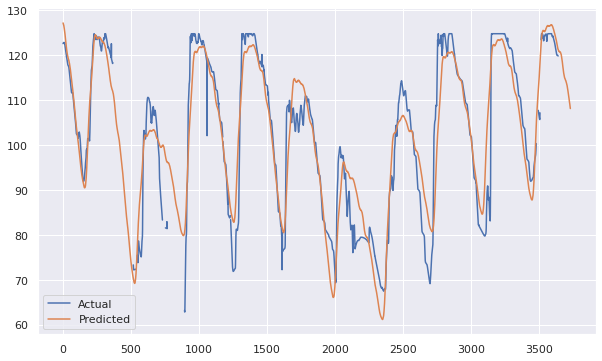

In [ ]:
# plot expected vs actual
pyplot.plot(level['y'].values, label='Actual')
pyplot.plot(forecast_level['yhat'].values, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
df.to_csv('df.csv')
from google.colab import files
files.download("df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('predicted.csv')
fig = px.line(df, x="ds", y="level", color="type")
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      136 non-null    datetime64[ns]
 1   level   136 non-null    float64       
 2   type    136 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.3+ KB


# End